In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as cmo
from datetime import datetime

Text(0, 0.5, 'Wind stress [Pa]')

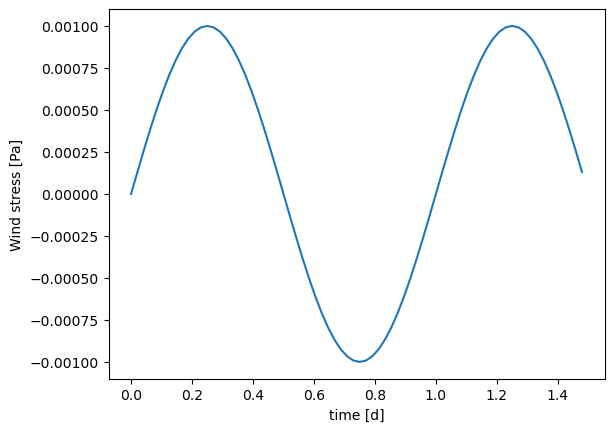

In [2]:
ndays = 11
dtw = 1/48
t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
wind_freq = 2
amp = 0.001
wind_strs = np.sin(t*wind_freq*np.pi)*amp
plt.plot(t[:72], wind_strs[:72])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')
# time = (t.values.astype(float))/10**9/86400

In [3]:
from datetime import datetime
def make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path):
  
    t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
    #t*2.0*pi for diurnal, 4pi for semidiurnal. This is for downwelling winds only. 
    uwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*u_amp+(0.5*u_amp)), dims=['sms_time'])
    vwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*0.5*v_amp+(0.5*v_amp)), dims=['sms_time'])


    # Create dataset
    ds = xr.Dataset({'sms_time': t, 'sustr': uwind_strs, 'svstr': vwind_strs})

    ds.attrs['Description'] = 'Forcing for ideal shelf'
    ds.attrs['Author'] = 'Dylan Schlichting'
    ds.attrs['Created'] = datetime.now().isoformat()
    ds.attrs['type'] = 'ROMS FRC file'
    ds['sms_time'].attrs['units'] = 'days'
    ds['sustr'].attrs['units'] = 'Newton meter-2'
    ds['svstr'].attrs['units'] = 'Newton meter-2'

    print('Writing netcdf FRC file: '+output_path)
    # Save dataset to a netcdf file  
    ds.to_netcdf(output_path)



In [4]:
def make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path):
  
    t = xr.DataArray(np.arange(0, ndays+dtw, dtw)[:-1], dims=['sms_time'])
    #t*2.0*pi for diurnal, 4pi for semidiurnal. This is for downwelling winds only. 
    uwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*u_amp), dims=['sms_time'])
    vwind_strs = xr.DataArray((np.sin(t*wind_freq*np.pi)*v_amp), dims=['sms_time'])


    # Create dataset
    ds = xr.Dataset({'sms_time': t, 'sustr': uwind_strs, 'svstr': vwind_strs})

    ds.attrs['Description'] = 'Forcing for ideal shelf'
    ds.attrs['Author'] = 'Dylan Schlichting'
    ds.attrs['Created'] = datetime.now().isoformat()
    ds.attrs['type'] = 'ROMS FRC file'
    ds['sms_time'].attrs['units'] = 'days'
    ds['sustr'].attrs['units'] = 'Newton meter-2'
    ds['svstr'].attrs['units'] = 'Newton meter-2'

    print('Writing netcdf FRC file: '+output_path)
    # Save dataset to a netcdf file  
    ds.to_netcdf(output_path)

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_0_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

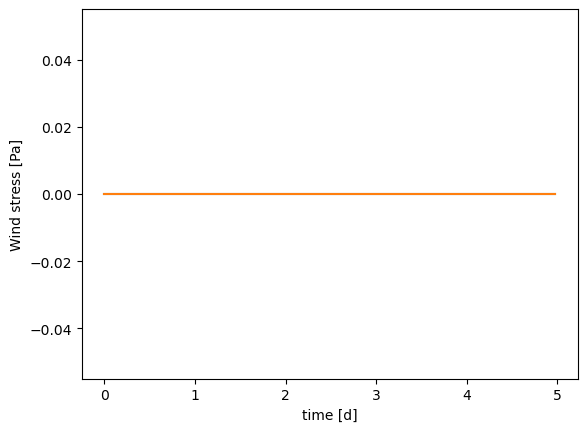

In [6]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_uwind_0_frc.nc'
ndays = 60
dtw = 1/48 
wind_freq = 2
u_amp = 0 
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Text(0, 0.5, 'Wind stress [Pa]')

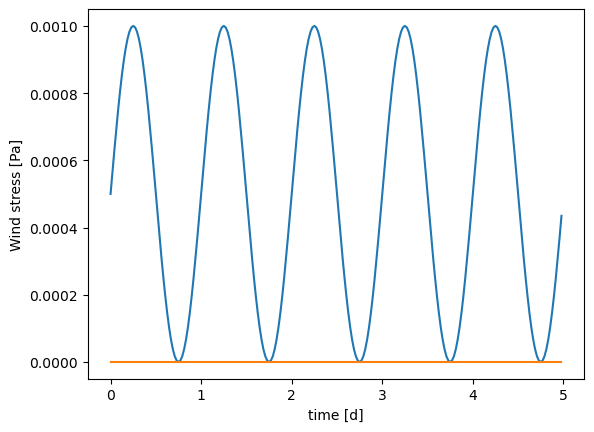

In [45]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_001_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.001 
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_001_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

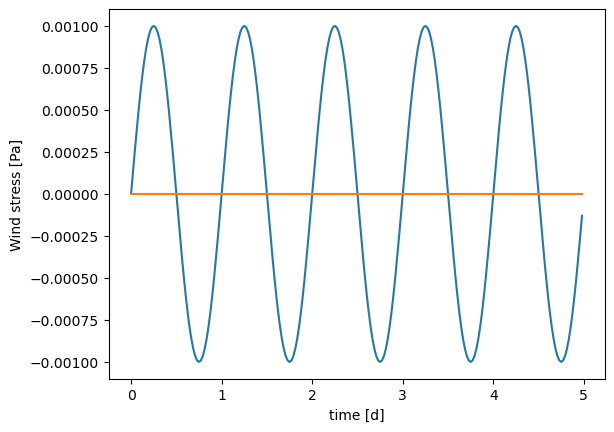

In [13]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_001_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.001 
v_amp = 0 
make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_005_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

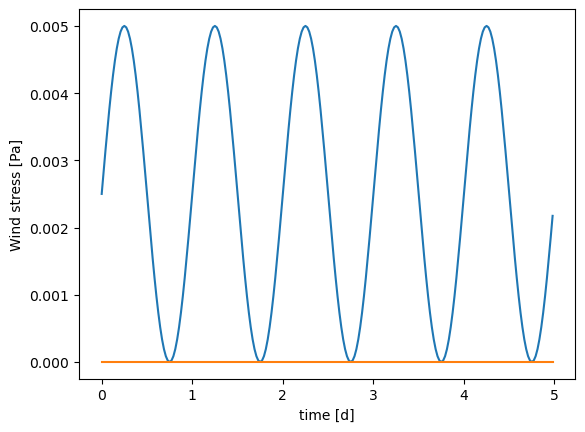

In [46]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_005_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.005 
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_005_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

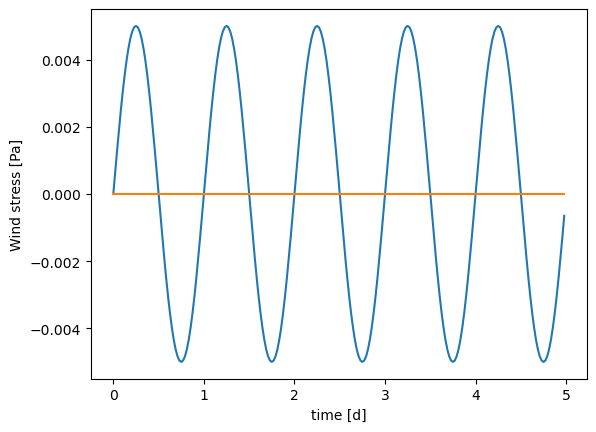

In [14]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_005_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.005 
v_amp = 0 
make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_01_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

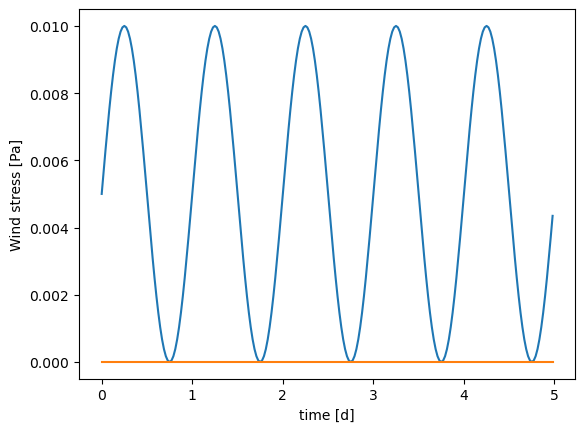

In [48]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_01_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.01
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_01_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

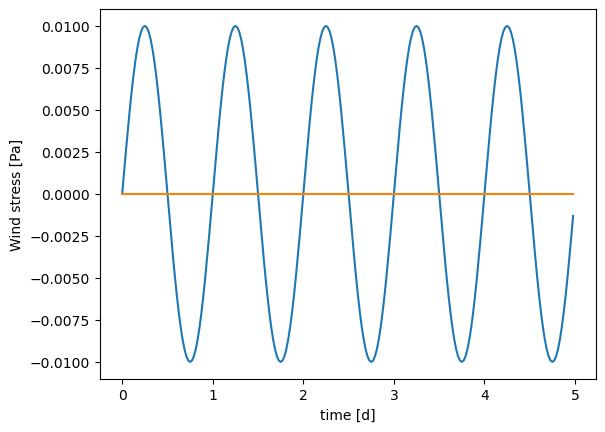

In [15]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_01_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.01
v_amp = 0 
make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_02_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

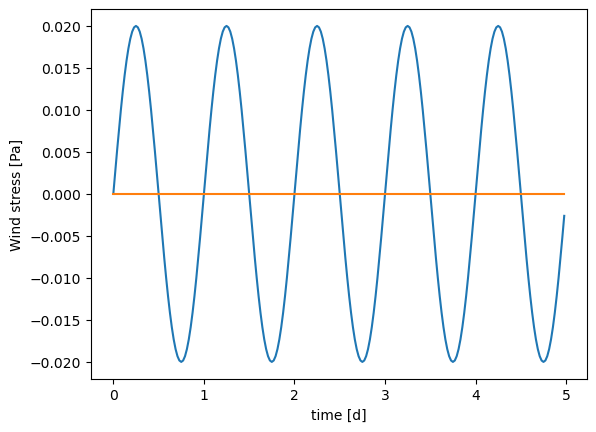

In [6]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_02_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.02
v_amp = 0 
make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_05_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

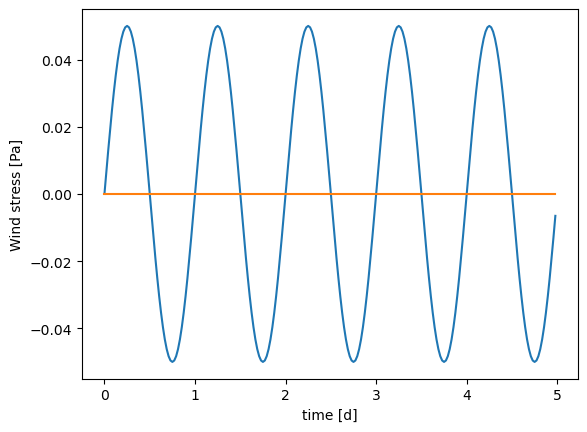

In [7]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_oscillatory_uwind_05_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.05
v_amp = 0 
make_oscillatory(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_05_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

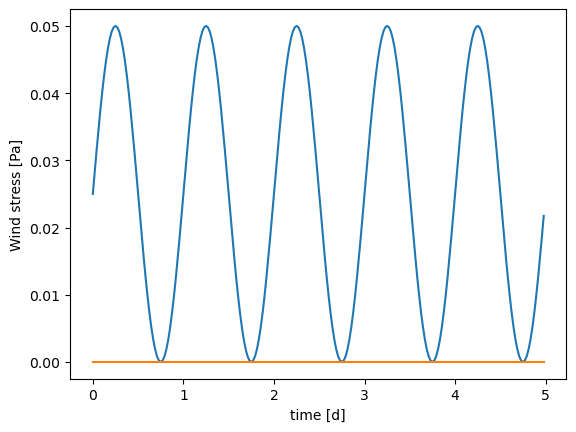

In [49]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_05_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.05
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_1_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

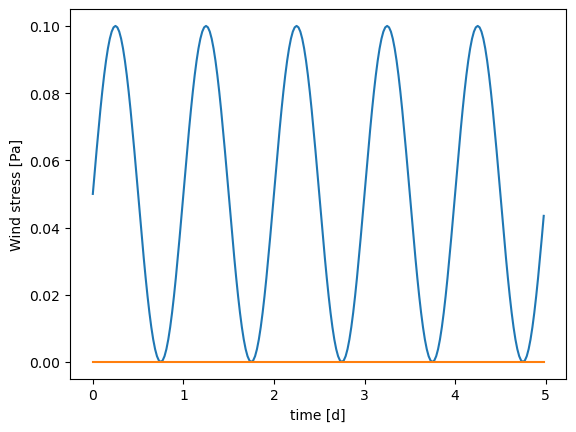

In [50]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_1_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.1
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_2_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

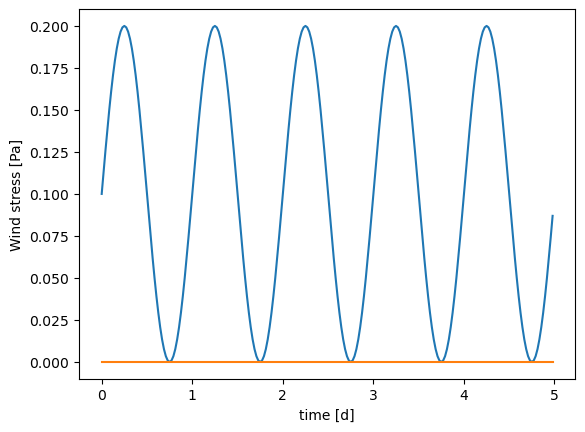

In [14]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_2_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.2
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_0_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

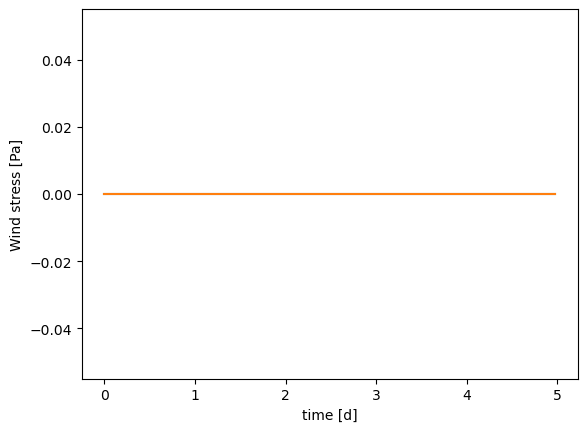

In [21]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_0_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

Writing netcdf FRC file: /d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_02_frc.nc


Text(0, 0.5, 'Wind stress [Pa]')

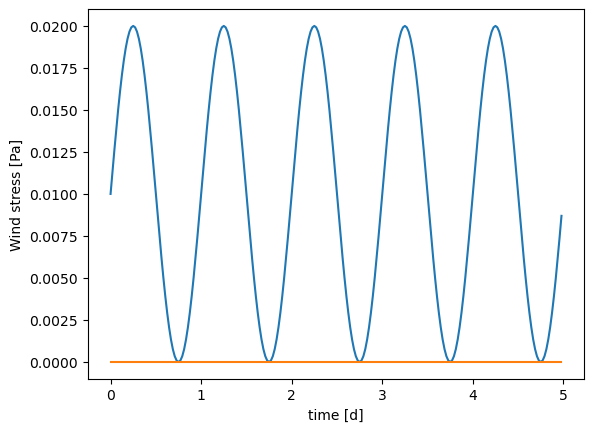

In [22]:
output_path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_02_frc.nc'
ndays = 30
dtw = 1/48 
wind_freq = 2
u_amp = 0.02
v_amp = 0 
make_frc(ndays, dtw, wind_freq, u_amp, v_amp, output_path)
#Open and plot just to check
dsf = xr.open_dataset(output_path)
time = (dsf.sms_time.values.astype(float))/10**9/86400
plt.plot(time[:240], dsf.sustr[:240])
plt.plot(time[:240], dsf.svstr[:240])
plt.xlabel('time [d]')
plt.ylabel('Wind stress [Pa]')

# Determine coriolis parameter that is roughly 90-95\% of the wind frequency, 

In [10]:
omega = 7.292e-5
phi = 28
f = 2*omega*np.sin(np.deg2rad(phi))
f

6.846773271669432e-05

In [13]:
24/25.56

0.9389671361502347

In [18]:
xr.open_dataset('/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_ho_5_dx_500_ini.nc')

<xarray.Dataset>
Dimensions:     (ocean_time: 1, eta_rho: 194, xi_rho: 194, s_rho: 30, eta_u: 194, xi_u: 193, eta_v: 193, xi_v: 194)
Coordinates:
  * ocean_time  (ocean_time) float64 0.0
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 187 188 189 190 191 192 193
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 187 188 189 190 191 192 193
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Dimensions without coordinates: eta_u, xi_u, eta_v, xi_v
Data variables:
    temp        (s_rho, eta_rho, xi_rho) float64 ...
    salt        (s_rho, eta_rho, xi_rho) float64 ...
    u           (ocean_time, s_rho, eta_u, xi_u) float64 ...
    v           (ocean_time, s_rho, eta_v, xi_v) float64 ...
    zeta        (ocean_time, eta_rho, xi_rho) float64 ...
    ubar        (ocean_time, eta_u, xi_u) float64 ...
    vbar        (ocean_time, eta_v, xi_v) float64 ...
Attributes:
    type:         ROMS FRC file
    Description:  Initial conditions for ideal shelf
    Author:       Dylan Schlichting
    Created:      2023-01-30T09:40:12.329476